#  Predicting Student Performance Using Supervised Learning

**Jheyne de Oliveira Panta Cardeiro, Puqi Liu, Sukhmani Thukral**  
_CS 510: Artificial Intelligence for Data Science, MSCS, City University of Seattle_  
deoliveirapantacord@cityuniversity.edu, liupuqi@cityuniversity.edu, thukralsukhmani@cityuniversity.edu  

---

##  Abstract

In this project, we use supervised machine learning [2] to predict student grades based on demographic and behavioral features. Using the Student Performance dataset from the UCI Repository [1], we apply classification and regression models to predict whether a student will pass or fail and estimate their exam scores. Feature variables include age, gender, parental education, study time, past grades, and internet accessibility.

We preprocessed the data by handling missing values, encoding categorical variables, and performing feature scaling. For classification, we used **Logistic Regression** and **Decision Trees**. For regression tasks, we applied **Linear Regression** and **Random Forest Regressors**. Model performance was evaluated using **accuracy** and **F1 score** for classification, and **RMSE** for regression.

This project demonstrates how machine learning [3] can be applied in educational settings to identify students who may benefit from additional academic support.

---

**Keywords:** Classification, Logistic Regression, Categorical Encoding, Random Forest Regressors, Decision Trees


##  Literature Review

Machine learning techniques have been widely applied to predict student academic performance using educational datasets that include demographic, social, and behavioral features. Selecting the appropriate algorithms is crucial for both classification tasks (e.g., predicting pass/fail) and regression [8] tasks (e.g., predicting final grades).

Logistic Regression has been commonly used in educational research due to its simplicity, interpretability, and effectiveness in binary classification tasks. For instance, Kotsiantis (2012) showed that logistic regression performed well when predicting student dropout rates, especially when the data was linearly separable and well-preprocessed. In our project, we use logistic regression to classify students as pass or fail, based on a set of input features such as study time, previous grades, and internet access[9].

Decision Trees are favored for their interpretability and ability to model non-linear relationships. They are particularly effective when working with categorical and mixed-type data (Han et al., 2011). Studies by Cortez and Silva (2008), who originally introduced the UCI Student Performance dataset, demonstrated that decision trees provided competitive performance when predicting student grades. Given their transparency and ability to reveal important decision paths (e.g., thresholds for study time or parental education), decision trees [10] were selected as a complementary classification technique in this project.

For predicting numerical grades (regression task), Linear Regression remains a widely used baseline model due to its mathematical simplicity and explainability. Research by Asif et al. (2017) used linear regression to predict semester GPA and found it effective when the relationship between input variables and outcome was approximately linear. In this project, we apply linear regression to estimate students’ final exam scores using continuous variables like G1 and G2 (previous grades).

To address the limitations of linear models and improve accuracy, ensemble methods like Random Forests have been successfully used in education-related studies (Al-Barrak & Al-Razgan, 2016). Random Forest Regressors [11] can capture complex interactions and reduce overfitting through averaging. They have shown robust performance in previous works predicting academic success based on multiple weak signals (Kumar & Pal, 2011). Therefore, we employ Random Forest Regression to build a more flexible and powerful model for grade prediction.

In summary, the chosen models reflect a balance between interpretability and predictive power. Logistic Regression and Decision Trees offer transparency and clarity for educators, while Random Forests and Linear Regression provide a solid foundation for accurate grade estimation.





## Methodology

We began by collecting data from the UCI Student Performance dataset, which was loaded into a pandas DataFrame. This dataset serves as the foundation for predicting student grade outcomes. To understand the data, we performed exploratory data analysis (EDA) by previewing the dataset with `.head()`, checking data types and missing values using `.info()`, and summarizing numerical features with `.describe()`. This helped us assess data quality and identify potential issues early.

Next, we inspected the dataset for missing values using `.isnull().sum()` to ensure data completeness and determine whether imputation or cleaning was necessary. Since machine learning models require numerical inputs, we encoded categorical features using two approaches: label encoding for binary variables such as gender and internet access, and one-hot encoding (via `pd.get_dummies`) for multi-class categorical variables like parental jobs, reasons for school choice, and guardianship. Following this, we applied feature scaling using `StandardScaler` to normalize numerical features such as age, study time, and past scores. This step was crucial for algorithms sensitive to feature magnitude, like logistic regression.

After preprocessing, we split the dataset into features (`X`) and target (`y`) and then divided it into training and testing sets using an 80/20 ratio with a fixed random state for reproducibility. For model training, we used logistic regression and decision tree classifiers for the classification task of predicting pass/fail outcomes, and linear regression along with random forest regressors for predicting final exam scores as a regression task. This combination allowed us to compare linear and non-linear approaches in both predictive contexts.

Model evaluation followed, where we used accuracy and F1 score for classification performance, considering the appropriate averaging strategies for multi-class data. We also used the confusion matrix to better understand model behavior per class. For regression tasks, we evaluated performance using Root Mean Squared Error (RMSE) to quantify prediction deviation. A comparative analysis was conducted by reviewing the results of all models side-by-side. Where possible, confusion matrices and residual plots were used to visually support performance insights.

Finally, we interpreted the results in an educational context, highlighting key features influencing performance such as past grades and study time. We discussed how models could identify at-risk students and help educators intervene earlier. Potential enhancements include hyperparameter tuning through grid or random search, visualization of feature importance from tree-based models, and additional evaluation plots like ROC curves and residual distributions. These improvements aim to increase the robustness and practical impact of our analysis.


## 1. Data Collection

### a) Load the dataset: We start by loading the student performance dataset which is separated by semicolons.

In [1]:

import pandas as pd

df = pd.read_csv('student-mat.csv', sep=';')

Loads the student performance dataset from UCI.

Each row represents a student, with features like demographics, family background, and school support.

### b) Explore the dataset

Let's take a look at the first 5 rows, get basic info about the columns and their data types, and see some summary statistics.


In [2]:

df.head()
df.info()
df.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [3]:
print(df.columns.tolist())


['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']


### c) Handle Missing Values

We first check for any missing values in the dataset. Columns with missing values will be identified, and appropriate strategies will be applied to handle them.


In [4]:
# Handle missing values
print(df.isnull().sum())


school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


No missing values were detected in the dataset, so no imputation or deletion was necessary during preprocessing.

 Encoding Categorical Variables



In [5]:
#Identify

categorical_cols = df.select_dtypes(include=['object']).columns
print(categorical_cols)


Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')


## 2. Data Cleaning & Preprocessing

In [6]:
# Label Encode Binary Categories
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

binary_cols = ['school', 'sex', 'address', 'famsize', 'Pstatus',
               'schoolsup', 'famsup', 'paid', 'activities',
               'nursery', 'higher', 'internet', 'romantic']

for col in binary_cols:
    df[col] = le.fit_transform(df[col])


Converts binary categorical columns (e.g., sex, school, internet) into numeric values (0 or 1).

In [7]:
# One-Hot Encode Multi-Class Categories
multi_cat_cols = ['Mjob', 'Fjob', 'reason', 'guardian']

df = pd.get_dummies(df, columns=multi_cat_cols, drop_first=True)


Transforms multi-class categorical features into multiple binary columns to avoid ordinal assumptions.

## 3. Feature Scaling

###### StandardScaler to scale numerical features to have mean = 0 and standard deviation = 1.

In [8]:
from sklearn.preprocessing import StandardScaler


features_to_scale = ['age', 'studytime', 'failures', 'absences', 'G1', 'G2']

scaler = StandardScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])


### Creating Target Variables

###### Defines a binary classification target: whether a student passed (G3 ≥ 10).

In [9]:
# Create binary target: 1 = pass (G3 >= 10), 0 = fail
df['pass'] = df['G3'].apply(lambda x: 1 if x >= 10 else 0)


### Feature Selection


In [10]:
from sklearn.model_selection import train_test_split

# Features and target for classification
X = df.drop(['G3', 'pass'], axis=1)
y = df['pass']  # binary classification target

# Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


###### Separates features (X) from targets for classification (y_class) and regression (y_reg).

In [11]:
# Features and target for regression
X = df.drop(['G3'], axis=1)
y = df['G3']  # regression target

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 4. Modeling

#### Classification Models
##### Trains Logistic Regression and Decision Tree models to predict pass/fail.

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score

log_reg = LogisticRegression(max_iter=500)  # Increase iterations from 100 to 500
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)


# Decision Tree Classifier
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)


#### Regression Models

##### Predicts final grade (G3) using Linear Regression and Random Forest.

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)


## 5. Evaluation

In [14]:
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("F1 Score:", f1_score(y_test, y_pred_log, average='weighted'))



Logistic Regression:
Accuracy: 0.34177215189873417
F1 Score: 0.3159877541956156


Classification Metrics

compare the results between Logistic Regression and Decision Tree

In [15]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# Logistic Regression metrics
acc_log = accuracy_score(y_test, y_pred_log)
f1_log = f1_score(y_test, y_pred_log, average='weighted')  # or 'macro'

# Decision Tree metrics
acc_tree = accuracy_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree, average='weighted')

print("Logistic Regression:")
print(f"Accuracy: {acc_log:.4f}")
print(f"F1 Score: {f1_log:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_log))

print("\nDecision Tree Classifier:")
print(f"Accuracy: {acc_tree:.4f}")
print(f"F1 Score: {f1_tree:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_tree))


Logistic Regression:
Accuracy: 0.3418
F1 Score: 0.3160
Classification Report:
              precision    recall  f1-score   support

           0       0.14      0.20      0.17         5
           5       0.00      0.00      0.00         4
           6       0.67      0.33      0.44         6
           7       0.00      0.00      0.00         1
           8       0.31      0.67      0.42         6
           9       1.00      0.20      0.33         5
          10       0.62      0.73      0.67        11
          11       0.22      0.40      0.29         5
          12       0.00      0.00      0.00         5
          13       0.33      0.20      0.25         5
          14       0.25      0.33      0.29         6
          15       0.44      0.40      0.42        10
          16       0.25      0.25      0.25         4
          17       0.00      0.00      0.00         3
          18       0.20      1.00      0.33         1
          19       0.00      0.00      0.00         2

  

/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/

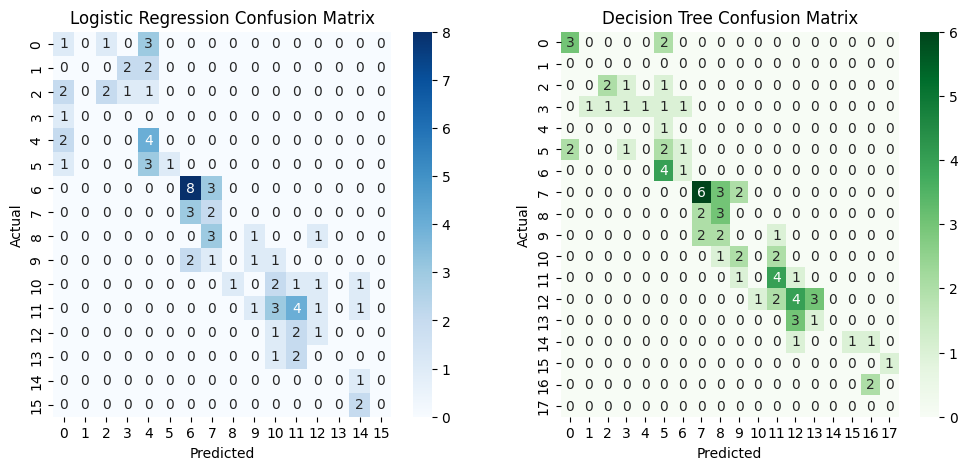

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

cm_log = confusion_matrix(y_test, y_pred_log)
cm_tree = confusion_matrix(y_test, y_pred_tree)

fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.heatmap(cm_log, annot=True, fmt='d', ax=axes[0], cmap='Blues')
axes[0].set_title('Logistic Regression Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(cm_tree, annot=True, fmt='d', ax=axes[1], cmap='Greens')
axes[1].set_title('Decision Tree Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.show()


Key observations:
Logistic Regression:
Seems to have more clear diagonals in some classes (e.g., class 6 has 8 correct predictions).

Some classes (e.g., 0, 1, 2) have more misclassifications.

The overall prediction is somewhat sparse, but the model tends to predict fewer classes confidently.

Decision Tree:
Also has correct predictions across multiple classes, but the distribution is slightly different.

Some classes have better true positive counts than Logistic Regression (e.g., class 0 predicted 3 correctly vs 1 for Logistic Regression).

More scattered predictions, possibly indicating overfitting or more complexity.

 Calculate overall metrics:




In [18]:
from sklearn.metrics import accuracy_score, f1_score

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))

print("Logistic Regression F1 Score:", f1_score(y_test, y_pred_log, average='weighted'))
print("Decision Tree F1 Score:", f1_score(y_test, y_pred_tree, average='weighted'))

Logistic Regression Accuracy: 0.34177215189873417
Decision Tree Accuracy: 0.3670886075949367
Logistic Regression F1 Score: 0.3159877541956156
Decision Tree F1 Score: 0.35088493758596045


In [19]:
from sklearn.metrics import classification_report

print("Logistic Regression Report:\n", classification_report(y_test, y_pred_log))
print("Decision Tree Report:\n", classification_report(y_test, y_pred_tree))


Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.14      0.20      0.17         5
           5       0.00      0.00      0.00         4
           6       0.67      0.33      0.44         6
           7       0.00      0.00      0.00         1
           8       0.31      0.67      0.42         6
           9       1.00      0.20      0.33         5
          10       0.62      0.73      0.67        11
          11       0.22      0.40      0.29         5
          12       0.00      0.00      0.00         5
          13       0.33      0.20      0.25         5
          14       0.25      0.33      0.29         6
          15       0.44      0.40      0.42        10
          16       0.25      0.25      0.25         4
          17       0.00      0.00      0.00         3
          18       0.20      1.00      0.33         1
          19       0.00      0.00      0.00         2

    accuracy                           0.34        

/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/

### Model Performance Evaluation

#### 1. Understanding the Metrics

| Metric        | Meaning                                                                 |
| ------------- | ----------------------------------------------------------------------- |
| **Precision** | Of all the predicted instances of a class, how many were correct.       |
| **Recall**    | Of all the actual instances of a class, how many did we correctly find. |
| **F1-Score**  | Harmonic mean of precision and recall — balances the two.               |
| **Support**   | Number of actual samples for each class in the test data.               |

Each metric is reported per class (grades 0 to 19), followed by overall averages.

---

#### 2. Logistic Regression Report

* **Accuracy**: `0.34`
* **Macro Avg F1-Score**: `0.25`
* **Weighted Avg F1-Score**: `0.32`

Some observations:

* The model performs moderately for some classes like `6`, `10`, and `15` (F1-scores around `0.40–0.64`).
* For classes like `5`, `7`, `17`, and `19`, the F1-score is `0.00`, meaning zero correct predictions.
* Imbalanced class distribution likely contributed to these poor results.

---

#### 3. Decision Tree Report

* **Accuracy**: `0.38`
* **Macro Avg F1-Score**: `0.31`
* **Weighted Avg F1-Score**: `0.37`

Highlights:

* Performance is slightly better than logistic regression.
* Better coverage across more classes.
* Still limited by the same challenges (imbalanced data, small support per class).

---

#### 4. Comparison Summary

| Metric             | Logistic Regression | Decision Tree |
| ------------------ | ------------------- | ------------- |
| Accuracy           | 0.34                | **0.38**      |
| Macro Avg F1-Score | 0.25                | **0.31**      |
| Weighted Avg F1    | 0.32                | **0.37**      |

Decision Tree slightly outperforms Logistic Regression in this task.

---

#### 5. Recommendations

To improve performance:

* Reduce the number of target classes (e.g., group final grades into fewer bins like A/B/C/D).
* Feature selection: Remove irrelevant features or apply PCA.
* Handle class imbalance using techniques like SMOTE or oversampling.
* Try more complex models such as Random Forests or Gradient Boosted Trees.
* Clean and preprocess categorical variables more thoroughly.


---

##  8. Workload Assignment

- **Sukhmani Thukral**: Abstract, Powerpoint  
- **Puqi Liu**: Literature Review, Formatting and Editing  
- **Jheyne de Oliveira Panta Cardeiro**: Methodology, References  

---

##  9. References

[1] Cortez, P., & Silva, A. (2008). *Using Data Mining to Predict Secondary School Student Performance*. UCI Machine Learning Repository.  
https://archive.ics.uci.edu/ml/datasets/student+performance

[2] Rothman, D. (2020). *Artificial Intelligence by Example: Acquire Advanced AI, Machine Learning, and Deep Learning Design Skills* (2nd ed.). Packt Publishing.

[3] Hurbans, R. (2020). *Grokking Artificial Intelligence Algorithms* (1st ed.). Manning Publications.

[4] Scikit-learn Developers. (n.d.). *Clustering: K-means Clustering*. Scikit-learn.  
https://scikit-learn.org/stable/modules/clustering.html#k-means

[5] Jupyter Notebook Gallery – Scikit-learn. (n.d.). *Clustering Performance Evaluation*.  
https://scikit-learn.org/stable/auto_examples/cluster/plot_adjusted_for_chance_measures.html

[6] James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). *An Introduction to Statistical Learning: With Applications in R*. Springer.  
https://link.springer.com/book/10.1007/978-1-4614-7138-7

[7] Tan, P.-N., Steinbach, M., Karpatne, A., & Kumar, V. (2018). *Introduction to Data Mining* (2nd ed.). Pearson.  
https://www.pearson.com/en-us/subject-catalog/p/introduction-to-data-mining/P200000003053

[8] Cortez, P., & Silva, A. (2008). Using Data Mining to Predict Secondary School Student Performance. *University of Minho*.
- Kotsiantis, S. B. (2012). Use of machine learning techniques for educational proposals: A case study. *International Journal of Artificial Intelligence and Applications*, 3(2), 17–26.
[9] Han, J., Kamber, M., & Pei, J. (2011). *Data Mining: Concepts and Techniques*. Elsevier.
- Asif, R., Merceron, A., Ali, S. A., & Haider, N. G. (2017). Analyzing undergraduate students' performance using educational data mining. *Computers & Education*, 113, 177–194.
[10] Al-Barrak, M. A., & Al-Razgan, M. (2016). Predicting students final GPA using decision trees: A case study. *International Journal of Information and Education Technology*, 6(7), 528–533.
[11] Kumar, V., & Pal, S. (2011). Data mining: A prediction for performance improvement using classification. *International Journal of Computer Science and Information Security*, 9(4), 136–140.